<a href="https://colab.research.google.com/github/shreyadeep01/DATA240_Project/blob/initial-colab-change-files-_sh/DATA240_project_w_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


Load datasets  Google drivesfrom

In [72]:
merged_raw_data_url = 'https://drive.google.com/file/d/1WDfh8HLYOtUNuhRZqKCScd1qb4l9sqyj/view?usp=sharing'
merged_raw_data_url = 'https://drive.google.com/uc?id=' + merged_raw_data_url.split('/')[-2]

churn_df = pd.read_csv('Datasets/merged_data.csv')

print(churn_df)


                                                msno  is_churn  \
0       K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=         1   
1       moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=         1   
2       dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=         1   
3       otEcMhAX3mU4gumUSogqgteN3oaNmhdmTkoof2iRYEE=         1   
4       t5rqTxCnG7s5VBgEfdkQCezv5KBK7+DMujNibYgylrs=         1   
...                                              ...       ...   
346049  i21C/gnxqgu1EIO6eBzGDhqcvuzEfV1u78eYJjLPh5I=         0   
346050  5dXGSlRH5LQVFbTUGQwfyyaFb8w/FVqfTS8N4aNEots=         0   
346051  SjVZDYaiKgEHpFX1PcFDS94b9CFdaHjg78rfumtm/F4=         0   
346052  /QlhSIWEZelYnwttYJSQL50EJJ2yRV+ThQIVQLvctp8=         0   
346053  iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=         0   

        playtime_per_day  city  bd  gender  registered_via  \
0             14106.6695    13  35       0               7   
1             11303.9945     9  28       0               3   
2             23121.0

In [73]:
churn_df.dtypes


msno                       object
is_churn                    int64
playtime_per_day          float64
city                        int64
bd                          int64
gender                      int64
registered_via              int64
registration_init_time      int64
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date            int64
membership_expire_date      int64
is_cancel                   int64
dtype: object

In [74]:
# set row names (index) to the msno column

churn_df = churn_df.set_index('msno')

print(churn_df)


                                              is_churn  playtime_per_day  \
msno                                                                       
K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=         1        14106.6695   
moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=         1        11303.9945   
dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=         1        23121.0130   
otEcMhAX3mU4gumUSogqgteN3oaNmhdmTkoof2iRYEE=         1         3098.3520   
t5rqTxCnG7s5VBgEfdkQCezv5KBK7+DMujNibYgylrs=         1         1794.9300   
...                                                ...               ...   
i21C/gnxqgu1EIO6eBzGDhqcvuzEfV1u78eYJjLPh5I=         0         2580.4430   
5dXGSlRH5LQVFbTUGQwfyyaFb8w/FVqfTS8N4aNEots=         0        10595.9480   
SjVZDYaiKgEHpFX1PcFDS94b9CFdaHjg78rfumtm/F4=         0         6164.1825   
/QlhSIWEZelYnwttYJSQL50EJJ2yRV+ThQIVQLvctp8=         0        12926.0640   
iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=         0         4931.6120   

           

see the multiple feature relationship between the target variable

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [67]:

# Correlation Analysis
correlations = churn_df.corr()



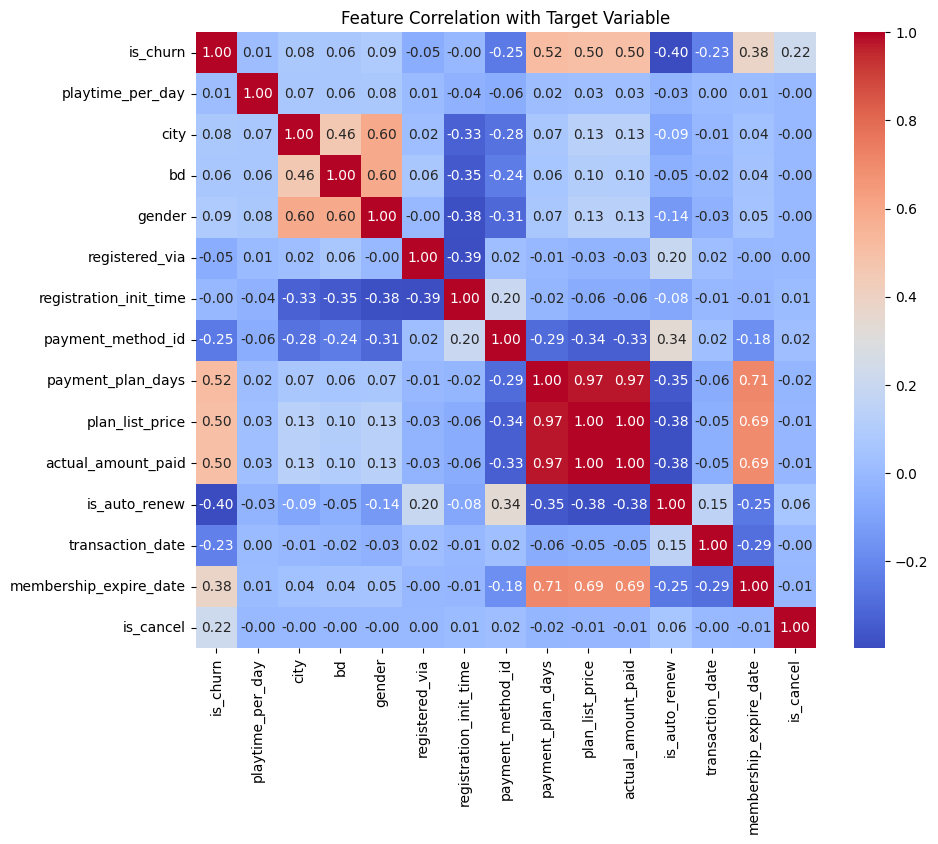

In [68]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation with Target Variable')
plt.show()



In [69]:

# Feature Importance using Random Forest
X = churn_df.drop('is_churn', axis=1)
y = churn_df['is_churn']
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)


KeyboardInterrupt: 

In [ ]:

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]



NameError: name 'importances' is not defined

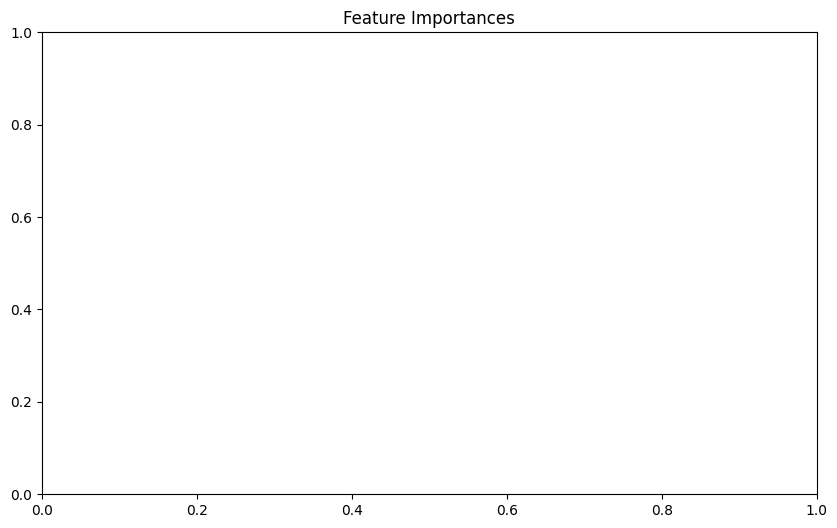

In [70]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
#added these 5 visuals at 24th nov 11.00pm


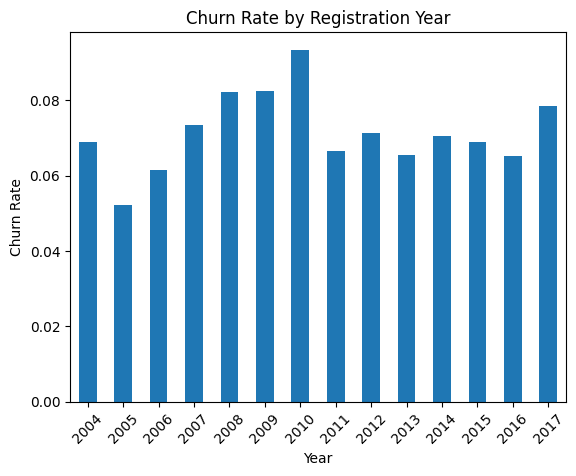

In [71]:
# Assuming registration_init_time is in the format YYYY
churn_df['registration_year'] = pd.to_datetime(churn_df['registration_init_time'], format='%Y')

# Group by registration year and calculate churn rate
churn_over_years = churn_df.groupby(churn_df['registration_year'].dt.year)['is_churn'].mean()

churn_over_years.plot(kind='bar')
plt.title('Churn Rate by Registration Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


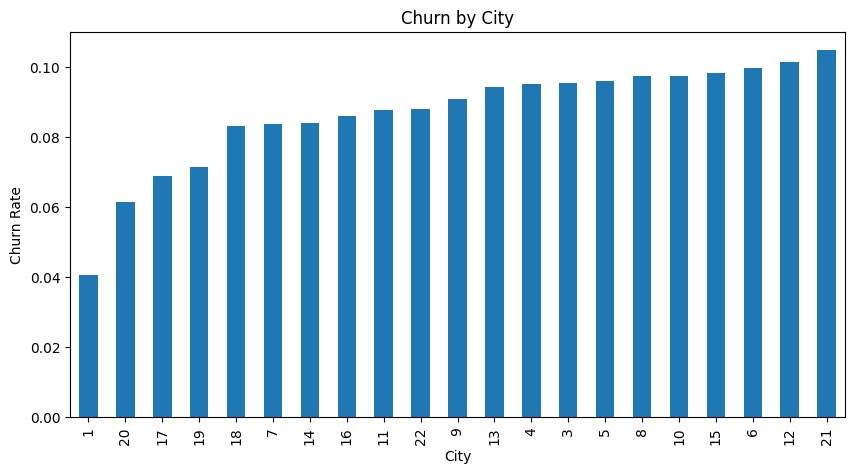

In [ ]:
#churn by city
city_churn = churn_df.groupby('city')['is_churn'].mean().sort_values()
city_churn.plot(kind='bar', figsize=(10, 5))
plt.title('Churn by City')
plt.xlabel('City')
plt.ylabel('Churn Rate')
plt.show()


NameError: ignored

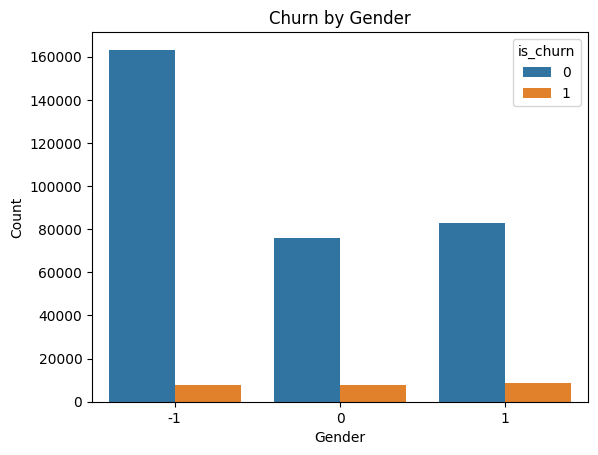

In [ ]:
# Replace 'gender_integers' with the actual integers representing genders in your dataset
sns.countplot(x='gender', hue='is_churn', data=churn_df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
#plt.xticks(range(len(gender)), ['Gender1', 'Gender2'])  # Replace with actual gender names
plt.show()


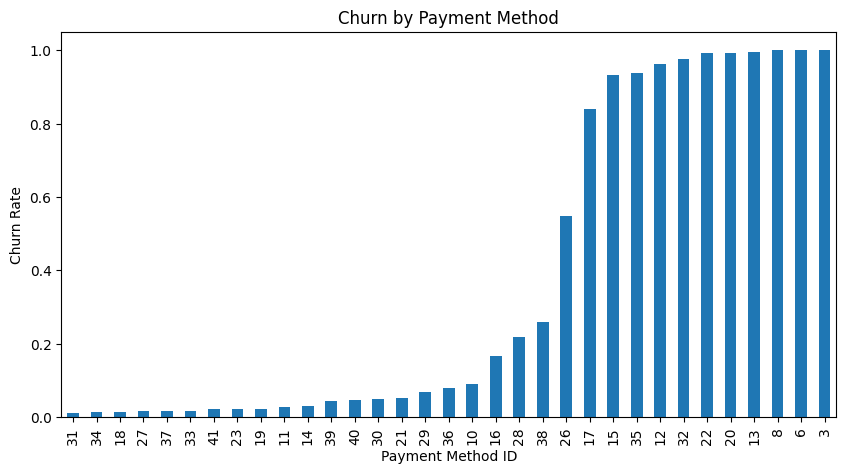

In [ ]:
#churn by payment method
payment_method_churn = churn_df.groupby('payment_method_id')['is_churn'].mean().sort_values()
payment_method_churn.plot(kind='bar', figsize=(10, 5))
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method ID')
plt.ylabel('Churn Rate')
plt.show()


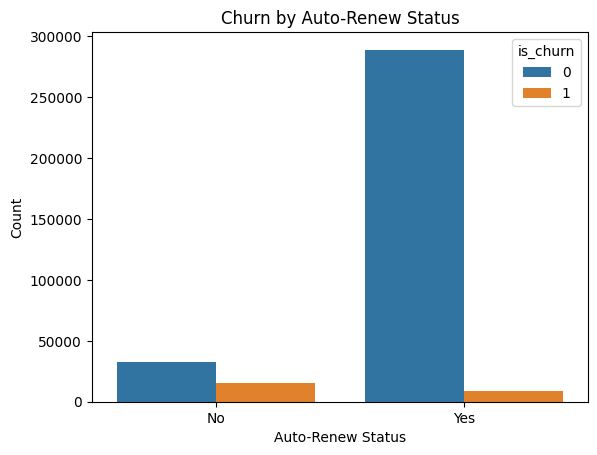

In [ ]:
#churn by auto renewal
sns.countplot(x='is_auto_renew', hue='is_churn', data=churn_df)
plt.title('Churn by Auto-Renew Status')
plt.xlabel('Auto-Renew Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


Split training and test data

In [ ]:
# Identify features and target variable
X = churn_df.drop(['is_churn'], axis=1)
y = churn_df['is_churn']

yes_count = churn_df['is_churn'].value_counts().get(1, 0)
no_count = churn_df['is_churn'].value_counts().get(0, 0)
print(f"count of churned users: {yes_count}")
print(f"count of non-churned users: {no_count}")

yes_percent = (yes_count / (yes_count + no_count)) * 100
no_percent = (no_count / (yes_count + no_count)) * 100

print(f"Percentage of churned users: {yes_percent:.2f}%")
print(f"Percentage of non-churned users: {no_percent:.2f}%")


count of churned users: 24092
count of non-churned users: 321962
Percentage of churned users: 6.96%
Percentage of non-churned users: 93.04%


This shows a huge difference in the churned and non-churned users, showing Class-Imbalance

Models ran on imbalanced data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:

# Initialize classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}


In [ ]:

# Function to evaluate classifiers
def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Precision-Recall AUC:", average_precision_score(y_test, y_proba))
    print("Confusion matrix:", confusion_matrix(y_test, y_pred))



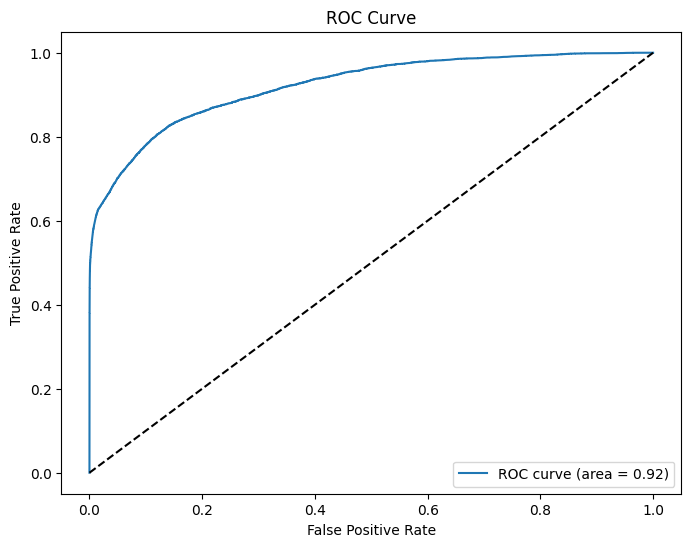

In [ ]:

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


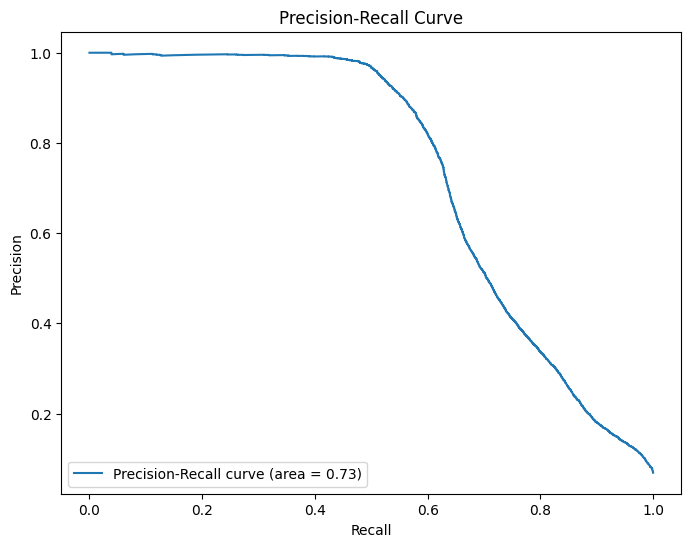

In [ ]:

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall curve (area = {auc(recall, precision):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()


In [ ]:

# Evaluate each classifier
for name, clf in classifiers.items():
    #print(f"Evaluating {name} Classifier:")
    evaluate_classifier(clf, X_train, y_train, X_test, y_test)


Evaluating KNN Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     96679
           1       0.92      0.46      0.61      7138

    accuracy                           0.96    103817
   macro avg       0.94      0.73      0.79    103817
weighted avg       0.96      0.96      0.95    103817

Accuracy: 0.9597753739753605
ROC AUC: 0.7579238334740904
Precision-Recall AUC: 0.5157530120383931
Confusion matrix: [[96387   292]
 [ 3884  3254]]
Evaluating Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     96679
           1       0.54      0.59      0.56      7138

    accuracy                           0.94    103817
   macro avg       0.76      0.78      0.77    103817
weighted avg       0.94      0.94      0.94    103817

Accuracy: 0.9377847558684994
ROC AUC: 0.7752117998436684
Precision-Recall AUC: 0.347653924681515
Confusion matrix: [[93170  3509]
 [ 29

In [ ]:


# Define a function for evaluation and plotting
def evaluate_and_plot(clf, clf_name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    # Print classifier report and accuracy
    print(f"Results for {clf_name}:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Precision-Recall AUC:", average_precision_score(y_test, y_proba))

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {clf_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Plot Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall Curve (area = {auc(recall, precision):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {clf_name}')
    plt.legend(loc="lower left")
    plt.show()



Results for KNN:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     96679
           1       0.92      0.46      0.61      7138

    accuracy                           0.96    103817
   macro avg       0.94      0.73      0.79    103817
weighted avg       0.96      0.96      0.95    103817

Accuracy: 0.9597753739753605
ROC AUC: 0.7579238334740904
Precision-Recall AUC: 0.5157530120383931


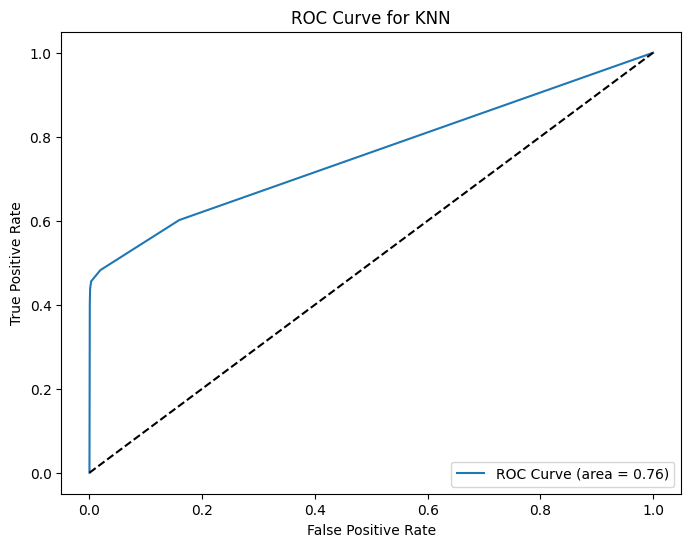

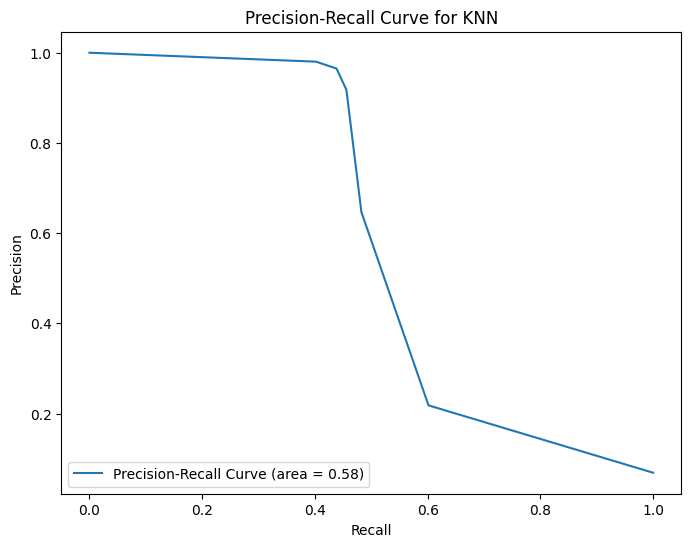

In [ ]:
# Evaluate and plot for each classifier
classifiers = {
    "KNN": KNeighborsClassifier(),
}

for clf_name, clf in classifiers.items():
    evaluate_and_plot(clf, clf_name)


Results for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     96679
           1       0.54      0.59      0.56      7138

    accuracy                           0.94    103817
   macro avg       0.76      0.78      0.77    103817
weighted avg       0.94      0.94      0.94    103817

Accuracy: 0.9377847558684994
ROC AUC: 0.7752117998436684
Precision-Recall AUC: 0.347653924681515


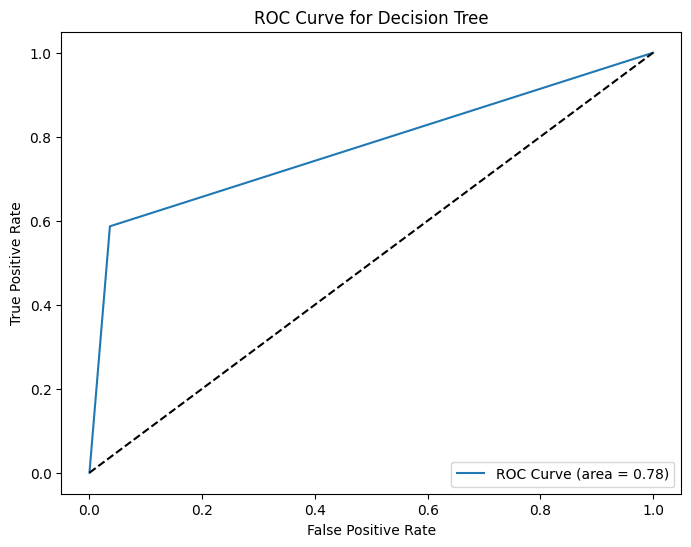

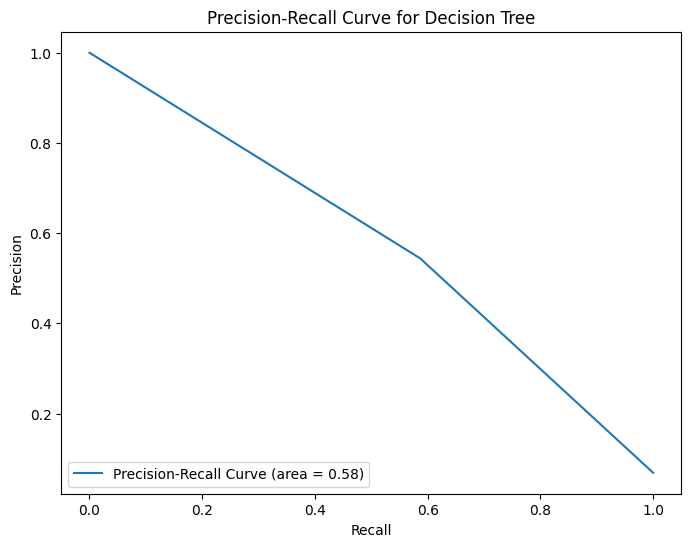

In [ ]:
# Evaluate and plot for each classifier
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    #"Random Forest": RandomForestClassifier(random_state=42),
    #"AdaBoost": AdaBoostClassifier(random_state=42),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=42),
    #"XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

for clf_name, clf in classifiers.items():
    evaluate_and_plot(clf, clf_name)


Results for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     96679
           1       0.76      0.58      0.66      7138

    accuracy                           0.96    103817
   macro avg       0.86      0.78      0.82    103817
weighted avg       0.96      0.96      0.96    103817

Accuracy: 0.9584942735775451
ROC AUC: 0.8799819890516998
Precision-Recall AUC: 0.6881822039445498


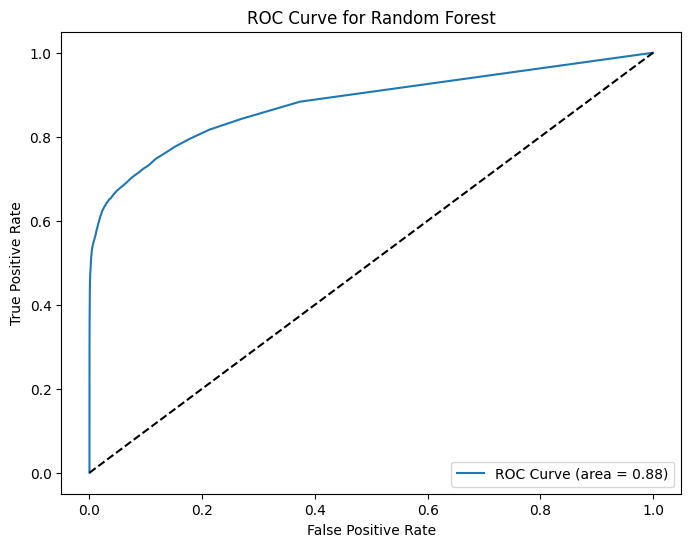

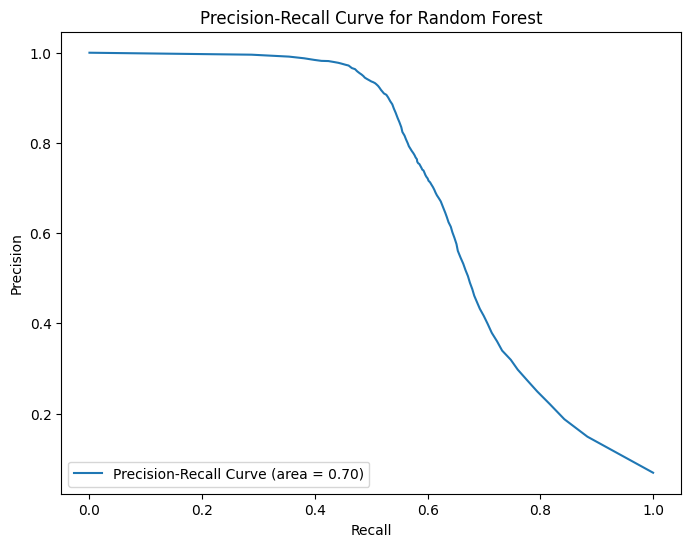

In [ ]:
# Evaluate and plot for each classifier
classifiers = {
   # "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    #"AdaBoost": AdaBoostClassifier(random_state=42),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=42),
    #"XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

for clf_name, clf in classifiers.items():
    evaluate_and_plot(clf, clf_name)


Results for AdaBoost:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     96679
           1       0.88      0.54      0.67      7138

    accuracy                           0.96    103817
   macro avg       0.92      0.77      0.82    103817
weighted avg       0.96      0.96      0.96    103817

Accuracy: 0.963098529142626
ROC AUC: 0.9128404075184452
Precision-Recall AUC: 0.7127612635027232


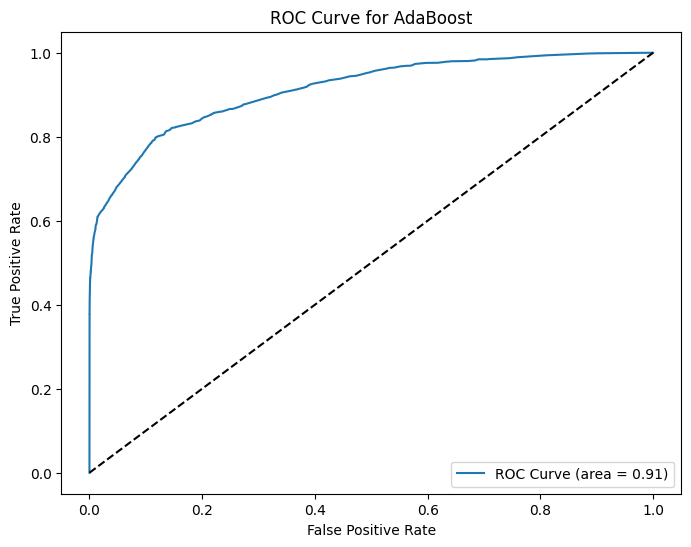

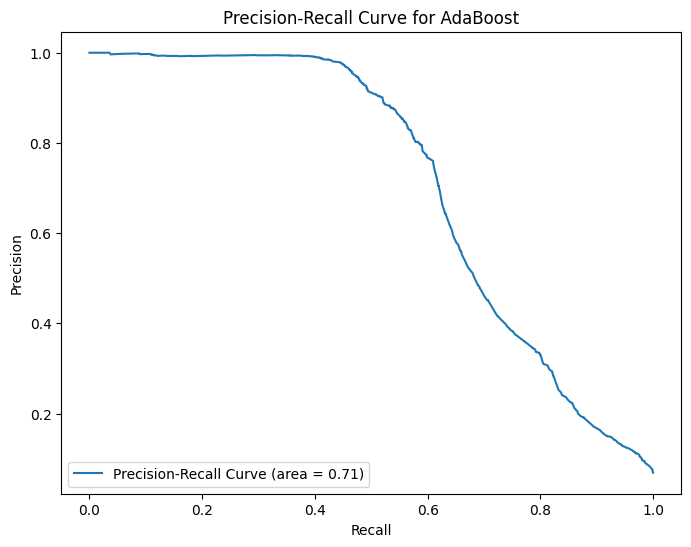

In [ ]:
# Evaluate and plot for each classifier
classifiers = {
   # "Decision Tree": DecisionTreeClassifier(random_state=42),
    #"Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=42),
    #"XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

for clf_name, clf in classifiers.items():
    evaluate_and_plot(clf, clf_name)


Results for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     96679
           1       0.92      0.54      0.68      7138

    accuracy                           0.97    103817
   macro avg       0.94      0.77      0.83    103817
weighted avg       0.96      0.97      0.96    103817

Accuracy: 0.9651887455811669
ROC AUC: 0.9200146264852791
Precision-Recall AUC: 0.7293259669549131


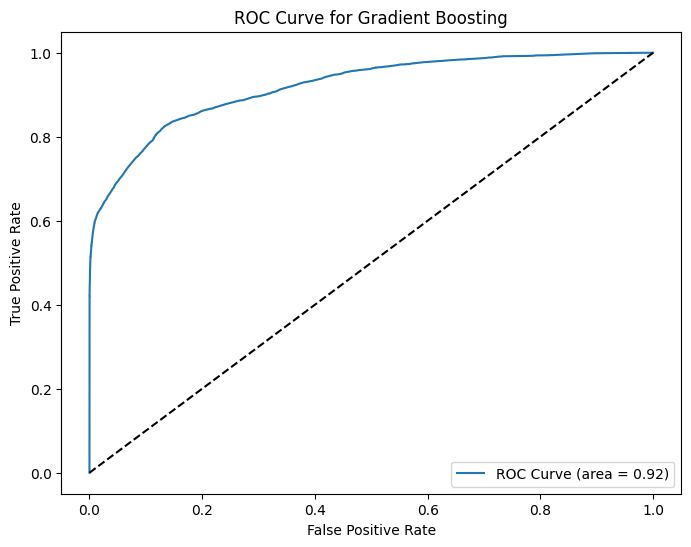

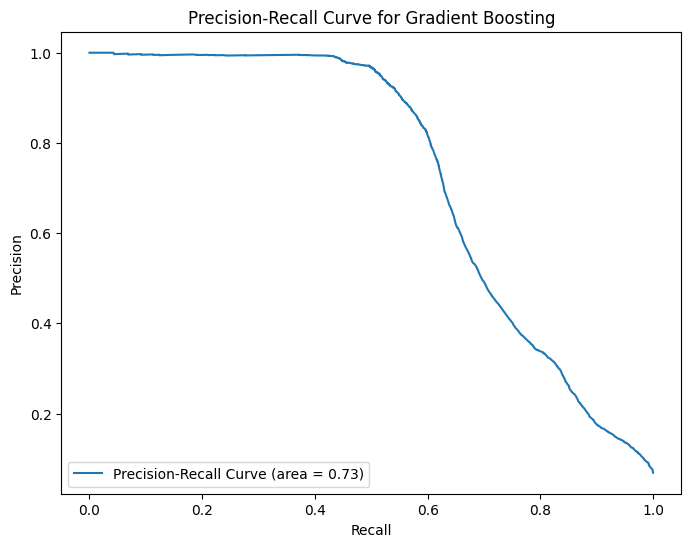

In [ ]:
# Evaluate and plot for each classifier
classifiers = {
   # "Decision Tree": DecisionTreeClassifier(random_state=42),
    #"Random Forest": RandomForestClassifier(random_state=42),
    #"AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    #"XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

for clf_name, clf in classifiers.items():
    evaluate_and_plot(clf, clf_name)


Results for XGBoost:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     96679
           1       0.91      0.55      0.68      7138

    accuracy                           0.97    103817
   macro avg       0.94      0.77      0.83    103817
weighted avg       0.96      0.97      0.96    103817

Accuracy: 0.9652080102488032
ROC AUC: 0.9210587295597004
Precision-Recall AUC: 0.7334975120540492


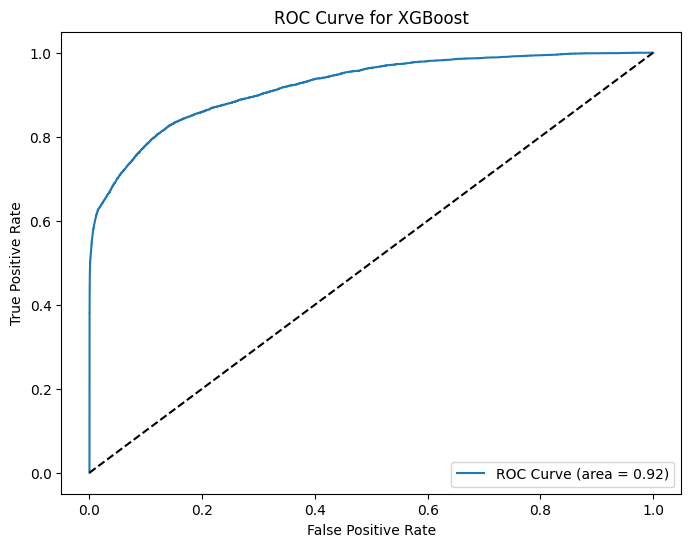

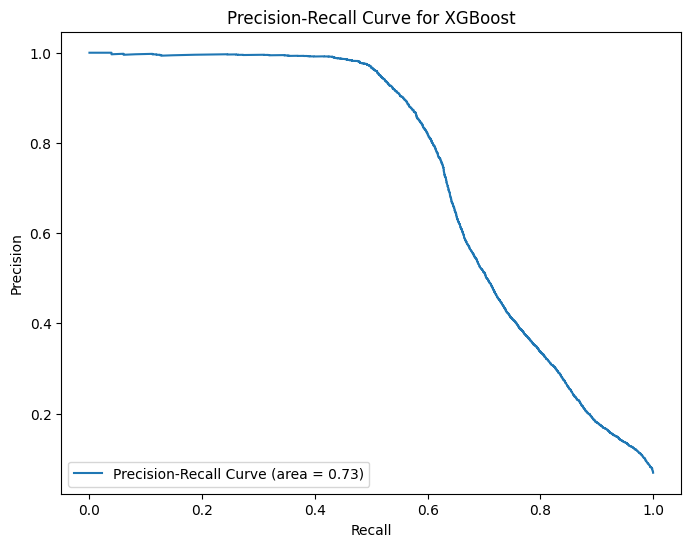

In [ ]:
# Evaluate and plot for each classifier
classifiers = {
   # "Decision Tree": DecisionTreeClassifier(random_state=42),
    #"Random Forest": RandomForestClassifier(random_state=42),
    #"AdaBoost": AdaBoostClassifier(random_state=42),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

for clf_name, clf in classifiers.items():
    evaluate_and_plot(clf, clf_name)


This shows a huge difference in the churned and non-churned users, showing Class-Imbalance

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Combine X_train and y_train into a single DataFrame for undersampling
train_data = pd.concat([X_train, y_train], axis=1)

# Identify the minority class label
minority_class_label = train_data['is_churn'].value_counts().idxmin()

# Apply random undersampling on imbalanced target data
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(train_data.drop('is_churn', axis=1), train_data['is_churn'])
print(y_resampled.value_counts())


0    19274
1    19274
Name: is_churn, dtype: int64


Train and evaluate classification models

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [ ]:
def plot_model_results(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(12, 5))

    # Plotting Confusion Matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Plotting Accuracy Score
    plt.subplot(1, 2, 2)
    plt.bar(model_name, acc)
    plt.title(f'Accuracy Score for {model_name}')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creating the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fitting the classifier to the resampled training data
dt.fit(X_resampled, y_resampled)

# Making predictions
y_pred_dt = dt.predict(X_test)

# Calculating accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy for Decision Tree Classifier: {accuracy_dt:.4f}')

# Calculating precision
precision_dt = precision_score(y_test, y_pred_dt)
print(f'Precision for Decision Tree Classifier: {precision_dt:.4f}')

# Calculating recall
recall_dt = recall_score(y_test, y_pred_dt)
print(f'Recall for Decision Tree Classifier: {recall_dt:.4f}')

# Calculating F1 score
f1_dt = f1_score(y_test, y_pred_dt)
print(f'F1 Score for Decision Tree Classifier: {f1_dt:.4f}')

# Calculating ROC-AUC score
roc_dt = roc_auc_score(y_test, y_pred_dt)
print(f'ROC-AUC Score for Decision Tree Classifier: {roc_dt:.4f}')


Accuracy for Decision Tree Classifier: 0.7757
Precision for Decision Tree Classifier: 0.2065
Recall for Decision Tree Classifier: 0.7814
F1 Score for Decision Tree Classifier: 0.3266
ROC-AUC Score for Decision Tree Classifier: 0.7784


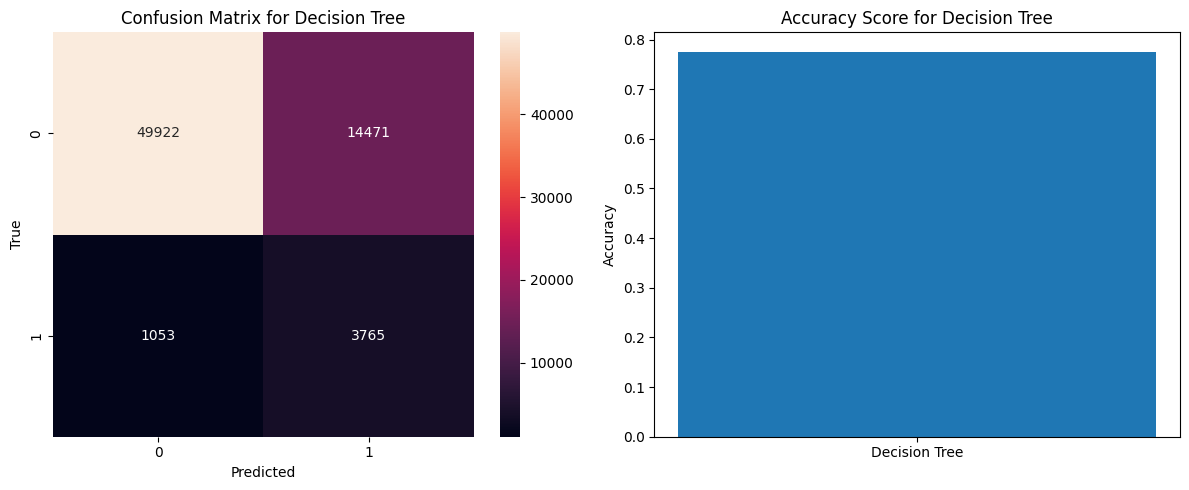

In [ ]:
# For Decision Tree
plot_model_results(dt, X_test, y_test, 'Decision Tree')


AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Creating the AdaBoost classifier
ab = AdaBoostClassifier(random_state=42)

# Fitting the classifier to the resampled training data
ab.fit(X_resampled, y_resampled)

# Making predictions
y_pred_ab = ab.predict(X_test)

# Calculating accuracy
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print(f'Accuracy for AdaBoost Classifier: {accuracy_ab:.4f}')

# Calculating precision
precision_ab = precision_score(y_test, y_pred_ab)
print(f'Precision for AdaBoost Classifier: {precision_ab:.4f}')

# Calculating recall
recall_ab = recall_score(y_test, y_pred_ab)
print(f'Recall for AdaBoost Classifier: {recall_ab:.4f}')

# Calculating F1 score
f1_ab = f1_score(y_test, y_pred_ab)
print(f'F1 Score for AdaBoost Classifier: {f1_ab:.4f}')

# Calculating ROC-AUC score
roc_ab = roc_auc_score(y_test, y_pred_ab)
print(f'ROC-AUC Score for AdaBoost Classifier: {roc_ab:.4f}')


Accuracy for AdaBoost Classifier: 0.8886
Precision for AdaBoost Classifier: 0.3607
Recall for AdaBoost Classifier: 0.7773
F1 Score for AdaBoost Classifier: 0.4927
ROC-AUC Score for AdaBoost Classifier: 0.8371


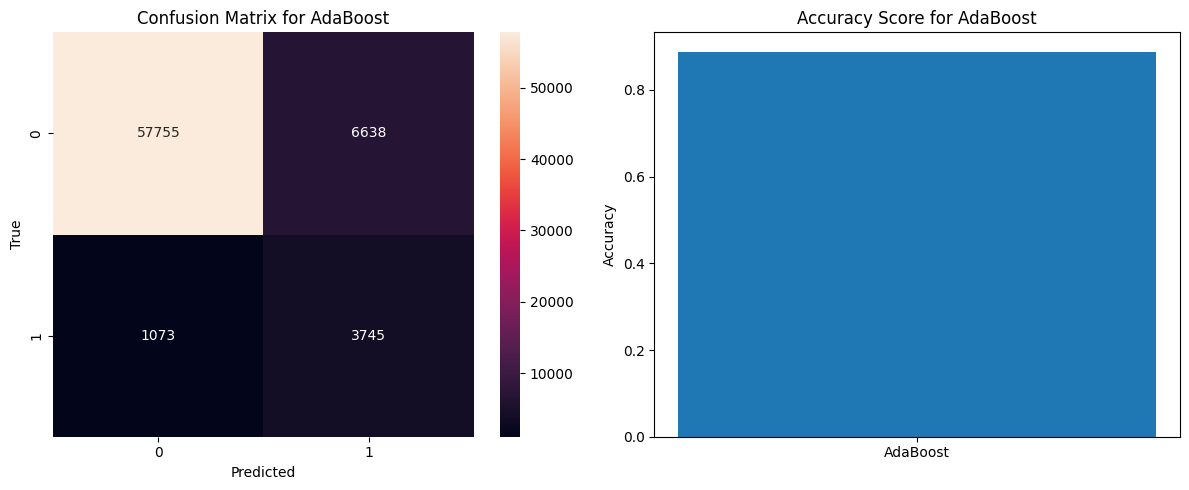

In [ ]:

# For AdaBoost
plot_model_results(ab, X_test, y_test, 'AdaBoost')


K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creating the KNN classifier
knn = KNeighborsClassifier()

# Fitting the classifier to the resampled training data
knn.fit(X_resampled, y_resampled)

# Making predictions
y_pred_knn = knn.predict(X_test)

# Calculating accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy for KNN Classifier: {accuracy_knn:.4f}')

# Calculating precision
precision_knn = precision_score(y_test, y_pred_knn)
print(f'Precision for KNN Classifier: {precision_knn:.4f}')

# Calculating recall
recall_knn = recall_score(y_test, y_pred_knn)
print(f'Recall for KNN Classifier: {recall_knn:.4f}')

# Calculating F1 score
f1_knn = f1_score(y_test, y_pred_knn)
print(f'F1 Score for KNN Classifier: {f1_knn:.4f}')

# Calculating ROC-AUC score
roc_knn = roc_auc_score(y_test, y_pred_knn)
print(f'ROC-AUC Score for KNN Classifier: {roc_knn:.4f}')


Accuracy for KNN Classifier: 0.7605
Precision for KNN Classifier: 0.1725
Recall for KNN Classifier: 0.6424
F1 Score for KNN Classifier: 0.2719
ROC-AUC Score for KNN Classifier: 0.7059


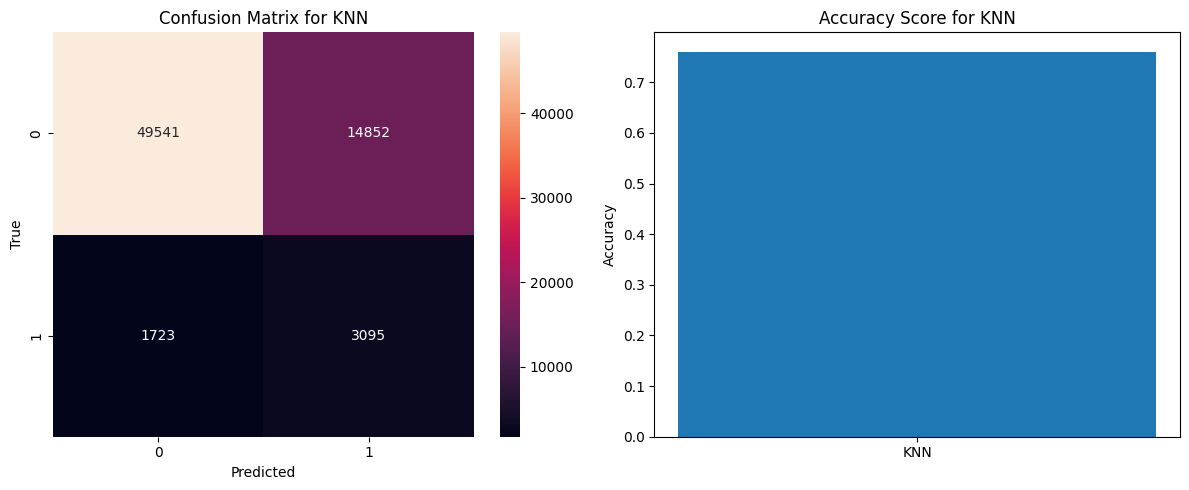

In [ ]:
# For KNN
plot_model_results(knn, X_test, y_test, 'KNN')


XGBoost Classifier

In [ ]:
import xgboost as xgb

# Creating the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Fitting the classifier to the resampled training data
xgb_clf.fit(X_resampled, y_resampled)

# Making predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Calculating accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy for XGBoost Classifier: {accuracy_xgb:.4f}')

# Calculating precision
precision_xgb = precision_score(y_test, y_pred_xgb)
print(f'Precision for XGBoost Classifier: {precision_xgb:.4f}')

# Calculating recall
recall_xgb = recall_score(y_test, y_pred_xgb)
print(f'Recall for XGBoost Classifier: {recall_xgb:.4f}')

# Calculating F1 score
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f'F1 Score for XGBoost Classifier: {f1_xgb:.4f}')

# Calculating ROC-AUC score
roc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(f'ROC-AUC Score for XGBoost Classifier: {roc_xgb:.4f}')


Accuracy for XGBoost Classifier: 0.8703
Precision for XGBoost Classifier: 0.3259
Recall for XGBoost Classifier: 0.8086
F1 Score for XGBoost Classifier: 0.4646
ROC-AUC Score for XGBoost Classifier: 0.8418


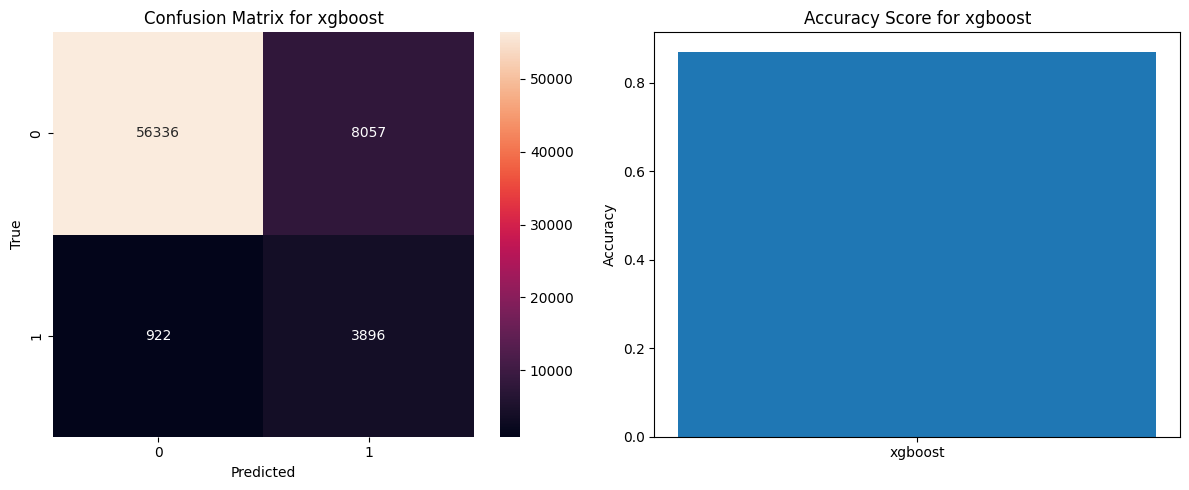

In [ ]:
# For xgboost
plot_model_results(xgb_clf, X_test, y_test, 'xgboost')


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=10, random_state=0)
RF.fit(X_resampled, y_resampled)

y_pred_RF = RF.predict(X_test)

# Calculating accuracy
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f'Accuracy for Random Forest Classifier with 10 Estimators: {accuracy_RF:.4f}')

# Calculating precision
precision_RF = precision_score(y_test, y_pred_RF)
print(f'Precision for Random Forest Classifier: {precision_RF:.4f}')

# Calculating recall
recall_RF = recall_score(y_test, y_pred_RF)
print(f'Recall for Random Forest Classifier: {recall_RF:.4f}')

# Calculating F1 score
f1_RF = f1_score(y_test, y_pred_RF)
print(f'F1 Score for Random Forest Classifier: {f1_RF:.4f}')

# Calculating ROC-AUC score
roc_RF = roc_auc_score(y_test, y_pred_RF)
print(f'ROC-AUC Score for Random Forest Classifier: {roc_RF:.4f}')


Accuracy for Random Forest Classifier with 10 Estimators: 0.8480
Precision for Random Forest Classifier: 0.2825
Recall for Random Forest Classifier: 0.7680
F1 Score for Random Forest Classifier: 0.4130
ROC-AUC Score for Random Forest Classifier: 0.8110


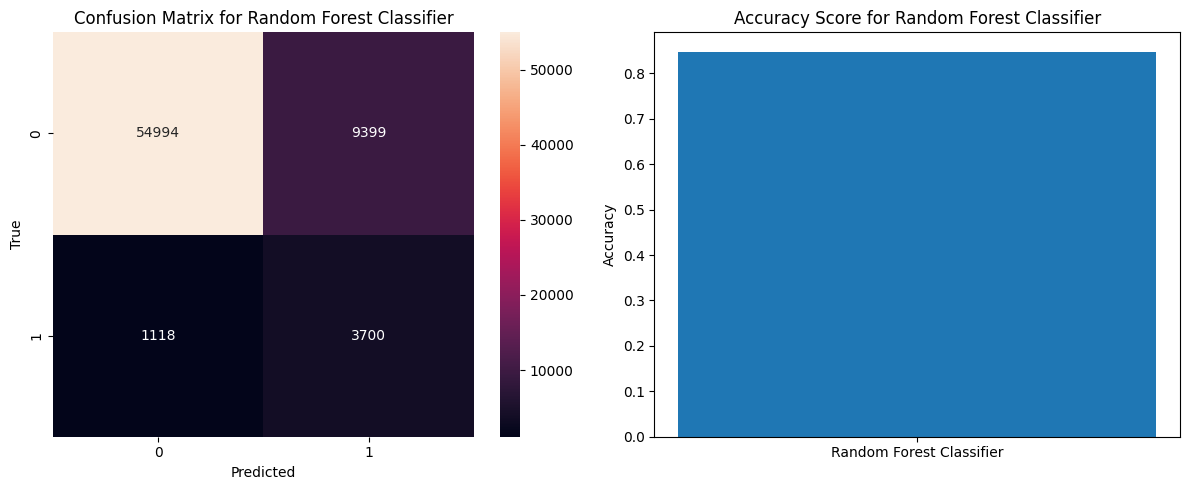

In [ ]:
# For Decision Tree
plot_model_results(RF, X_test, y_test, 'Random Forest Classifier')


Feature Importance for AdaBoost, XGBoost, and Random Forest Classifier

actual_amount_paid        0.20
registration_init_time    0.14
plan_list_price           0.14
payment_plan_days         0.12
registered_via            0.10
payment_method_id         0.10
is_auto_renew             0.06
membership_expire_date    0.04
is_cancel                 0.04
city                      0.02
bd                        0.02
transaction_date          0.02
playtime_per_day          0.00
gender                    0.00
dtype: float64


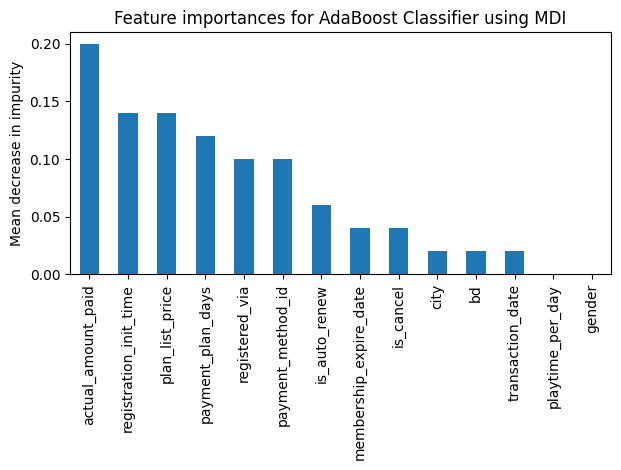

In [ ]:
# AdaBoost

# Plot feature importance using mean decrease in impurity
importances = ab.feature_importances_
# std = np.std([tree.feature_importances_ for tree in RF_200.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(forest_importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances for AdaBoost Classifier using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


is_auto_renew             0.401682
is_cancel                 0.312881
payment_plan_days         0.169568
actual_amount_paid        0.026031
transaction_date          0.021149
membership_expire_date    0.019663
plan_list_price           0.015595
payment_method_id         0.009852
registration_init_time    0.008752
city                      0.003962
gender                    0.002923
bd                        0.002716
registered_via            0.002620
playtime_per_day          0.002605
dtype: float32


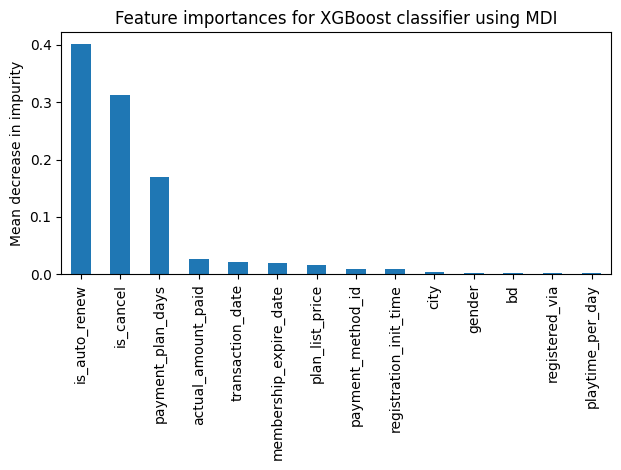

In [ ]:
#XGBoost

# Plot feature importance using mean decrease in impurity
importances = xgb_clf.feature_importances_

forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(forest_importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances for XGBoost classifier using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


playtime_per_day          0.240206
is_auto_renew             0.119367
is_cancel                 0.119135
plan_list_price           0.088192
bd                        0.075179
payment_plan_days         0.075085
registration_init_time    0.065418
city                      0.062708
payment_method_id         0.039776
actual_amount_paid        0.038439
membership_expire_date    0.031640
registered_via            0.019427
gender                    0.017526
transaction_date          0.007902
dtype: float64


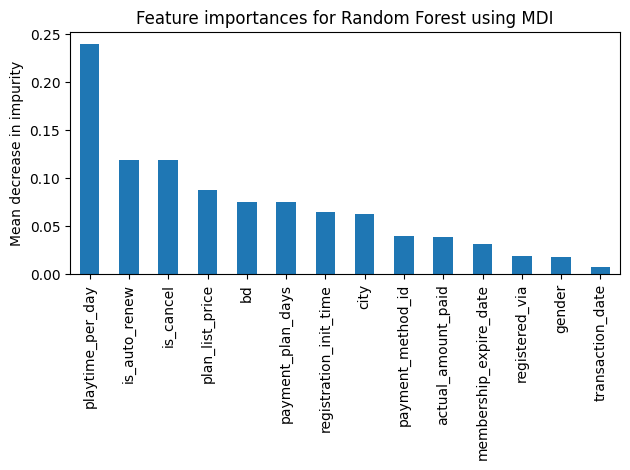

In [ ]:
# Random Forest

# Plot feature importance using mean decrease in impurity
importances = RF.feature_importances_

forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(forest_importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances for Random Forest using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
